In [2]:
import numpy as np
import math
import roboticstoolbox as rtb
from spatialmath.base import *
from spatialmath import SE3
import spatialmath.base.symbolic as sym



In [2]:
theta = sym.symbol('theta')
theta

theta

In [3]:
type(theta)

sympy.core.symbol.Symbol

In [4]:
theta.is_real

True

In [6]:
R = rotx(theta)

In [7]:
R

array([[1, 0, 0],
       [0, cos(theta), -sin(theta)],
       [0, sin(theta), cos(theta)]], dtype=object)

In [8]:
T = trotx(theta)

In [9]:
T

array([[1, 0, 0, 0],
       [0, cos(theta), -sin(theta), 0],
       [0, sin(theta), cos(theta), 0],
       [0, 0, 0, 1]], dtype=object)

In [11]:
type(T[1,1])

cos

In [12]:
T@T

array([[1, 0, 0, 0],
       [0, -sin(theta)**2 + cos(theta)**2, -2*sin(theta)*cos(theta), 0],
       [0, 2*sin(theta)*cos(theta), -sin(theta)**2 + cos(theta)**2, 0],
       [0, 0, 0, 1]], dtype=object)

In [13]:
T = SE3.Rx(theta)

In [14]:
T

   1         0         0         0         
   0        cos(theta)   -sin(theta)   0         
   0        sin(theta)   cos(theta)    0         
   0         0         0         1         


In [16]:
T2 = T*T

In [17]:
T2

   1        0            0             0         
  0            -sin(theta)**2 + cos(theta)**2 -2*sin(theta)*cos(theta) 0             
  0            2*sin(theta)*cos(theta) -sin(theta)**2 + cos(theta)**2 0             
   0        0            0             1         


In [3]:
puma = rtb.models.DH.Puma560(symbolic=True)

In [19]:
print(puma)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬───────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │  ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼───────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  pi/2 │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │     0 │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -pi/2 │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  pi/2 │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -pi/2 │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │     0 │ -266.0° │ 266.0° │
└────┴────────┴────────┴───────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────────────────────┬───────────────────────┬─────┬──────────────────────┬─────┐
│name │ q0  │ q1                   │ q2                    │ q3  │ q4                   │ q5  │
├─────┼─────┼──────────────────────┼───────────────────────┼─────┼──────────────────────┼─────┤
│  qr │  0° │ 28.6478897565412*pi° │ -28.6478897565412*pi° │  0° │  0°          

In [4]:
q = sym.symbol('q_:6')

In [21]:
q

(q_0, q_1, q_2, q_3, q_4, q_5)

In [22]:
q[0]

q_0

In [5]:
T = puma.fkine(q)

In [ ]:
T

In [ ]:
T[0]

In [8]:
from sympy import Matrix
Matrix(T.A)

Matrix([
[(((-sin(q_1)*sin(q_2)*cos(q_0) + cos(q_0)*cos(q_1)*cos(q_2))*cos(q_3) - sin(q_0)*sin(q_3))*cos(q_4) + (-sin(q_1)*cos(q_0)*cos(q_2) - sin(q_2)*cos(q_0)*cos(q_1))*sin(q_4))*cos(q_5) + (-(-sin(q_1)*sin(q_2)*cos(q_0) + cos(q_0)*cos(q_1)*cos(q_2))*sin(q_3) - sin(q_0)*cos(q_3))*sin(q_5), -(((-sin(q_1)*sin(q_2)*cos(q_0) + cos(q_0)*cos(q_1)*cos(q_2))*cos(q_3) - sin(q_0)*sin(q_3))*cos(q_4) + (-sin(q_1)*cos(q_0)*cos(q_2) - sin(q_2)*cos(q_0)*cos(q_1))*sin(q_4))*sin(q_5) + (-(-sin(q_1)*sin(q_2)*cos(q_0) + cos(q_0)*cos(q_1)*cos(q_2))*sin(q_3) - sin(q_0)*cos(q_3))*cos(q_5), -((-sin(q_1)*sin(q_2)*cos(q_0) + cos(q_0)*cos(q_1)*cos(q_2))*cos(q_3) - sin(q_0)*sin(q_3))*sin(q_4) + (-sin(q_1)*cos(q_0)*cos(q_2) - sin(q_2)*cos(q_0)*cos(q_1))*cos(q_4),  0.15005*sin(q_0) - 0.0203*sin(q_1)*sin(q_2)*cos(q_0) - 0.4318*sin(q_1)*cos(q_0)*cos(q_2) - 0.4318*sin(q_2)*cos(q_0)*cos(q_1) + 0.0203*cos(q_0)*cos(q_1)*cos(q_2) + 0.4318*cos(q_0)*cos(q_1)],
[(((-sin(q_0)*sin(q_1)*sin(q_2) + sin(q_0)*cos(q_1)*cos(q_2))

In [6]:
Ts = T.simplify()

In [9]:
M = Matrix(Ts.A)
M

Matrix([
[-((sin(q_0)*sin(q_3) - cos(q_0)*cos(q_3)*cos(q_1 + q_2))*cos(q_4) + sin(q_4)*sin(q_1 + q_2)*cos(q_0))*cos(q_5) - (sin(q_0)*cos(q_3) + sin(q_3)*cos(q_0)*cos(q_1 + q_2))*sin(q_5),   ((sin(q_0)*sin(q_3) - cos(q_0)*cos(q_3)*cos(q_1 + q_2))*cos(q_4) + sin(q_4)*sin(q_1 + q_2)*cos(q_0))*sin(q_5) - (sin(q_0)*cos(q_3) + sin(q_3)*cos(q_0)*cos(q_1 + q_2))*cos(q_5),  (sin(q_0)*sin(q_3) - cos(q_0)*cos(q_3)*cos(q_1 + q_2))*sin(q_4) - sin(q_1 + q_2)*cos(q_0)*cos(q_4),  0.15005*sin(q_0) - 0.4318*sin(q_1 + q_2)*cos(q_0) + 0.4318*cos(q_0)*cos(q_1) + 0.0203*cos(q_0)*cos(q_1 + q_2)],
[ ((sin(q_0)*cos(q_3)*cos(q_1 + q_2) + sin(q_3)*cos(q_0))*cos(q_4) - sin(q_0)*sin(q_4)*sin(q_1 + q_2))*cos(q_5) - (sin(q_0)*sin(q_3)*cos(q_1 + q_2) - cos(q_0)*cos(q_3))*sin(q_5), (-(sin(q_0)*cos(q_3)*cos(q_1 + q_2) + sin(q_3)*cos(q_0))*cos(q_4) + sin(q_0)*sin(q_4)*sin(q_1 + q_2))*sin(q_5) + (-sin(q_0)*sin(q_3)*cos(q_1 + q_2) + cos(q_0)*cos(q_3))*cos(q_5), -(sin(q_0)*cos(q_3)*cos(q_1 + q_2) + sin(q_3)*cos(q_0))*sin(q

In [29]:
M[:3,3]

Matrix([
[ 0.15005*sin(q_0) - 0.4318*sin(q_1 + q_2)*cos(q_0) + 0.4318*cos(q_0)*cos(q_1) + 0.0203*cos(q_0)*cos(q_1 + q_2)],
[-0.4318*sin(q_0)*sin(q_1 + q_2) + 0.4318*sin(q_0)*cos(q_1) + 0.0203*sin(q_0)*cos(q_1 + q_2) - 0.15005*cos(q_0)],
[                                     0.4318*sin(q_1) + 0.0203*sin(q_1 + q_2) + 0.4318*cos(q_1 + q_2) + 0.67183]])

In [ ]:
from sympy import ccode, pycode, octave_code
print(ccode(M, assign_to="T"))

In [ ]:
print(pycode(M))

In [10]:
from sympy import lambdify
T_func = lambdify(q, M, modules='numpy')

In [33]:
T_func(0, 0, 0, 0, 0, 0)

array([[ 1.     , -0.     , -0.     ,  0.4521 ],
       [ 0.     ,  1.     , -0.     , -0.15005],
       [ 0.     , -0.     ,  1.     ,  1.10363],
       [ 0.     ,  0.     ,  0.     ,  1.     ]])

In [36]:
from spatialmath.base import *
from spatialmath import SE3
import numpy as np
Pa = np.array([[2],[2],[2],[10]])
Pa = Pa/10
I = np.eye(4)
I = np.insert(I,3,[0.2,0.2,0.2,1],axis=1)
Pa = np.delete(I,4,1)
Pa = SE3(0.2,0.2,0.2)
Pp = SE3(0,0,0.19)
xis,ips,zed = sym.symbol('x,y,z')
Pq = SE3(xis,ips,zed)
#Ms*Pa
#print(Pa)
Pq

   1         0         0        x             
   0         1         0        y             
   0         0         1        z             
   0         0         0         1         


In [37]:
sol = puma.ikine_a(Pp)
sol

TypeError: Invalid NaN comparison

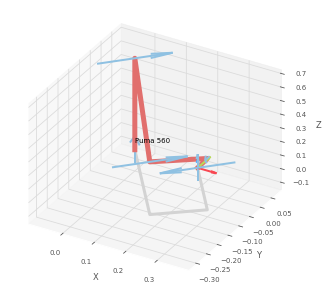

PyPlot3D backend, t = 0.05, scene:
  Puma 560

<Figure size 432x288 with 0 Axes>

In [33]:
puma.plot(sol[0])

In [34]:
g = sym.symbol('g')
puma.gravity = [0, 0, g]

In [35]:
qd = sym.symbol('qd_:6')
qd

(qd_0, qd_1, qd_2, qd_3, qd_4, qd_5)

In [36]:
qdd = sym.symbol('qdd_:6')
qdd

(qdd_0, qdd_1, qdd_2, qdd_3, qdd_4, qdd_5)

In [37]:
%time tau = puma.rne_python(q, qd, qdd)

Wall time: 325 ms


In [38]:
from sympy import trigsimp, simplify

In [2]:
import numpy as np
import math
import roboticstoolbox as rtb
from spatialmath.base import *
from spatialmath import SE3
import spatialmath.base.symbolic as sym


In [7]:
from roboticstoolbox import ET
e = ET.Rz() * ET.tx(1) * ET.Rz() * ET.tx(1)
print(e)
e.fkine([0.5,0.5])

Rz(q0) ⊕ tx(1) ⊕ Rz(q1) ⊕ tx(1)


   0.5403   -0.8415    0         1.418     
   0.8415    0.5403    0         1.321     
   0         0         1         0         
   0         0         0         1         


In [9]:
from roboticstoolbox import ETS, ET
e = ET.Rz(0.3) # a single ET, rotation about z
ets1 = ETS(e)

ets2 = ET.Rz(0.3) * ET.tx(2) # an ETS

ets2[1]                      # an ET sliced from the ETS


tx(2)

In [24]:
from roboticstoolbox import ETS, ET
import math
pi = math.pi
l0 = ET.tx(-0.116)*ET.Rz()
l1 = ET.Rx(pi/2)*ET.tz(0.0294)*ET.Rz()
l2 = ET.tx(0.23)*ET.Rx(pi)*ET.Rz()
#l3 = ET.tx(0.08173)*ET.Ry(-pi/2)*ET.tz(-0.00286)*ET.Rz()
l4 = ET.tx(0.0019)*ET.Rx(pi/2)*ET.tz(-0.0904)*ET.Rz()
l3 = ET.tx(0.08173)*ET.Ry(-pi/2)*ET.tz(-0.00286)*ET.Rz()
#l4 = ET.tx(0.0019)*ET.tz(-0.0904)*ET.Rz()
l5 = ET.tx(0.0438)*ET.Ry(pi/2)*ET.Rz()

ets0,ets1,ets2,ets3,ets4,ets5 = ETS(l0),ETS(l1),ETS(l2),ETS(l3),ETS(l4),ETS(l5)
ets6 = l0*l1*l2*l3*l4*l5
T06 = ETS(ets0*ets1*ets2*ets3*ets4*ets5)
T06.compile()

SE3(-0.116, 0, 0) ⊕ Rz(q0) ⊕ SE3(0, -0.0294, 1.8e-18; 90°, -0°, 0°) ⊕ Rz(q0) ⊕ SE3(0.23, 0, 0; 180°, -0°, 0°) ⊕ Rz(q0) ⊕ SE3(0.08459, 0, -1.751e-19; 0°, -90°, -0°) ⊕ Rz(q0) ⊕ SE3(0.0019, 0.0904, -5.535e-18; 90°, -0°, 0°) ⊕ Rz(q0) ⊕ SE3(0.0438, 0, 0; 0°, 90°, -0°) ⊕ Rz(q0)


In [25]:
from roboticstoolbox import ETS, ERobot
ets = ET.Rz() * ET.Ry() * ET.tz(1) * ET.Ry() * ET.tz(1)
robot = ERobot(ets)
print(robot)

ERobot: noname, 3 joints (RRR)
┌─────┬────────┬───────┬────────┬─────────────────────┐
│link │  link  │ joint │ parent │ ETS: parent to link │
├─────┼────────┼───────┼────────┼─────────────────────┤
│   0 │ link0  │     0 │ BASE   │ Rz(q0)              │
│   1 │ link1  │     1 │ link0  │ Ry(q1)              │
│   2 │ link2  │     2 │ link1  │ tz(1) ⊕ Ry(q2)      │
│   3 │ @link3 │       │ link2  │ tz(1)               │
└─────┴────────┴───────┴────────┴─────────────────────┘



ERobot: PROCaN, 6 joints (RRRRRR), 2 branches
┌─────┬────────┬───────┬────────┬────────────────────────────────────────────────┐
│link │  link  │ joint │ parent │              ETS: parent to link               │
├─────┼────────┼───────┼────────┼────────────────────────────────────────────────┤
│   0 │ link1  │     0 │ BASE   │ tx(-0.116) ⊕ Rz(q0)                            │
│   1 │ link2  │     1 │ link1  │ Rx(90°) ⊕ tz(0.0294) ⊕ Rz(q1)                  │
│   2 │ link3  │     2 │ link2  │ tx(0.23) ⊕ Rx(180°) ⊕ Rz(q2)                   │
│   3 │ link4  │     3 │ link3  │ tx(0.08173) ⊕ Ry(-90°) ⊕ tz(-0.00286) ⊕ Rz(q3) │
│   4 │ link5  │     4 │ link4  │ tx(0.0019) ⊕ Rx(90°) ⊕ tz(-0.0904) ⊕ Rz(q4)    │
│   5 │ @link6 │     5 │ link5  │ tx(0.0438) ⊕ Ry(90°) ⊕ Rz(q5)                  │
│   6 │ @ee    │       │ link5  │ tx(0.1)                                        │
└─────┴────────┴───────┴────────┴────────────────────────────────────────────────┘



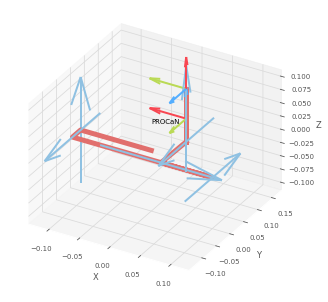

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [31]:
import roboticstoolbox as rtb
from roboticstoolbox import ETS, ERobot
Link = rtb.robot.Link
link1 = Link(l0, name='link1')
link2 = Link(l1, name='link2', parent=link1)
link3 = Link(l2, name='link3', parent=link2)
link4 = Link(l3, name='link4', parent=link3)
link5 = Link(l4, name='link5', parent=link4)
link6 = Link(l5, name='link6', parent=link5)
#link6 = Link(l5, name='link5', parent=link4)
ee = Link(ET.tx(0.1),name='ee', parent=link5)
procan = ERobot([link1, link2, link3,link4,link5,link6,ee],name='PROCaN')

print(procan)
q = [0,0,pi,-pi/2,pi,pi/2]
qz = [0,0,0,0,0,0]
qr = [0,0,pi,-pi/2,0,0]
q5 = [0.5,0.5,-1.57,0,1.57,1.57]
procan.plot(q)

ERobot: PROCaN, 6 joints (RRRRRR)
┌─────┬───────┬───────┬────────┬─────────────────────────────┐
│link │ link  │ joint │ parent │     ETS: parent to link     │
├─────┼───────┼───────┼────────┼─────────────────────────────┤
│   0 │ link1 │     0 │ BASE   │ tz(0.1) ⊕ Rz(q0)            │
│   1 │ link2 │     1 │ link1  │ Rx(90°) ⊕ Rz(q1)            │
│   2 │ link3 │     2 │ link2  │ tx(0.2) ⊕ Rz(q2)            │
│   3 │ link4 │     3 │ link3  │ tx(0.1) ⊕ Ry(-90°) ⊕ Rz(q3) │
│   4 │ link5 │     4 │ link4  │ Rx(90°) ⊕ tz(-0.1) ⊕ Rz(q4) │
│   5 │ link6 │     5 │ link5  │ Ry(90°) ⊕ Rz(q5)            │
│   6 │ @ee   │       │ link6  │ tx(0.1)                     │
└─────┴───────┴───────┴────────┴─────────────────────────────┘



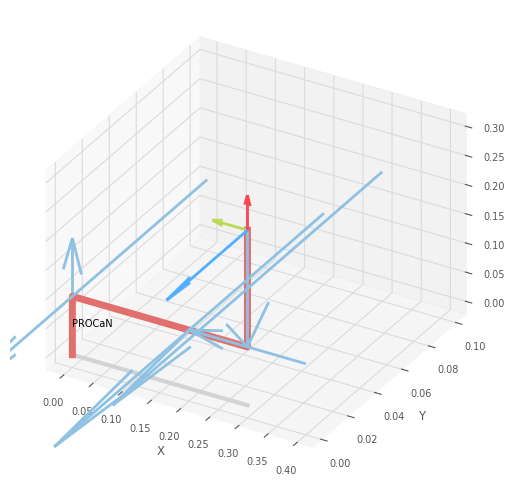

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 640x480 with 0 Axes>

In [2]:
import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
import math

pi = math.pi
l0 = ET.tz(0.1)*ET.Rz()

l1 = ET.Rx(pi/2)*ET.Rz()
l2 = ET.tx(0.2)*ET.Rz()
l3 = ET.tx(0.1)*ET.Ry(-pi/2)*ET.Rz()
l4 = ET.Rx(pi/2)*ET.tz(-0.1)*ET.Rz()
l5 = ET.Ry(pi/2)*ET.Rz()

Link = rtb.robot.Link
link0 = Link(l0, name='link1')

link1 = Link(l1, name='link2', parent=link0)
link2 = Link(l2, name='link3', parent=link1)
link3 = Link(l3, name='link4', parent=link2)
link4 = Link(l4, name='link5', parent=link3)
link5 = Link(l5, name='link6', parent=link4)
#link6 = Link(l5, name='link5', parent=link4)
ee = Link(ET.tx(0.1),name='ee', parent=link5)
procan = ERobot([link0,link1,link2,link3,link4,link5,ee],name='PROCaN')

print(procan)
q = [0,0,pi,-pi/2]
qz = [0,0,0,0,0,0]
qr = [1.0,0.5,1.0,0.5,1.5,1.5]
q3 = [0,0.5,0.5,0.5,0.5,0.5]
q4 = [0.78,0.78,0.78,0.78,0.78,0.78]
q90 = [1.57,1.57,1.57,1.57,1.57,1.57]
procan.plot(qz)

ERobot: PROCaN, 6 joints (RRRRRR)
┌─────┬────────┬───────┬────────┬──────────────────────────────────────────────┐
│link │  link  │ joint │ parent │             ETS: parent to link              │
├─────┼────────┼───────┼────────┼──────────────────────────────────────────────┤
│   0 │ link1  │     0 │ BASE   │ tz(0.0294) ⊕ Rz(q0)                          │
│   1 │ link2  │     1 │ link1  │ Rx(90°) ⊕ Rz(q1)                             │
│   2 │ link3  │     2 │ link2  │ tx(0.23) ⊕ Rz(q2)                            │
│   3 │ link4  │     3 │ link3  │ tx(0.08173) ⊕ Ry(-90°) ⊕ Rz(q3)              │
│   4 │ link5  │     4 │ link4  │ tx(-0.0019) ⊕ tz(-0.0904) ⊕ Rx(90°) ⊕ Rz(q4) │
│   5 │ @link6 │     5 │ link5  │ tx(0.0438) ⊕ Ry(90°) ⊕ Rz(q5)                │
└─────┴────────┴───────┴────────┴──────────────────────────────────────────────┘



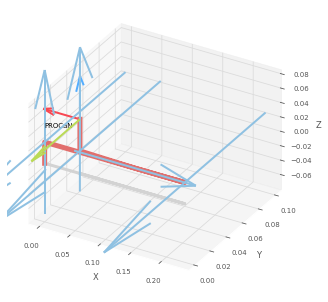

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [14]:
import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
import math

pi = math.pi

l0 = ET.tz(0.0294)*ET.Rz()
l1 = ET.Rx(pi/2)*ET.Rz()
l2 = ET.tx(0.23)*ET.Rz()
l3 = ET.tx(0.08173)*ET.Ry(-pi/2)*ET.Rz()
l4 = ET.tx(-0.0019)*ET.tz(-0.0904)*ET.Rx(pi/2)*ET.Rz()
l5 = ET.tx(0.0438)*ET.Ry(pi/2)*ET.Rz()

Link = rtb.robot.Link
link0 = Link(l0, name='link1')
link1 = Link(l1, name='link2', parent=link0)
link2 = Link(l2, name='link3', parent=link1)
link3 = Link(l3, name='link4', parent=link2)
link4 = Link(l4, name='link5', parent=link3)
link5 = Link(l5, name='link6', parent=link4)

procan = ERobot([link0,link1,link2,link3,link4,link5],name='PROCaN')

print(procan)
q = [0,0,pi,1.57,pi,1.57]
procan.plot(q)

In [16]:
import roboticstoolbox as rtb
puma = rtb.models.DH.Puma560()
print(puma)

DHRobot: Puma 560 (by Unimation), 6 joints (RRRRRR), dynamics, geometry, standard DH parameters
┌────┬────────┬────────┬────────┬─────────┬────────┐
│θⱼ  │   dⱼ   │   aⱼ   │   ⍺ⱼ   │   q⁻    │   q⁺   │
├────┼────────┼────────┼────────┼─────────┼────────┤
│ q1 │ 0.6718 │      0 │  90.0° │ -160.0° │ 160.0° │
│ q2 │      0 │ 0.4318 │   0.0° │ -110.0° │ 110.0° │
│ q3 │   0.15 │ 0.0203 │ -90.0° │ -135.0° │ 135.0° │
│ q4 │ 0.4318 │      0 │  90.0° │ -266.0° │ 266.0° │
│ q5 │      0 │      0 │ -90.0° │ -100.0° │ 100.0° │
│ q6 │      0 │      0 │   0.0° │ -266.0° │ 266.0° │
└────┴────────┴────────┴────────┴─────────┴────────┘

┌─┬──┐
└─┴──┘

┌─────┬─────┬──────┬───────┬─────┬──────┬─────┐
│name │ q0  │ q1   │ q2    │ q3  │ q4   │ q5  │
├─────┼─────┼──────┼───────┼─────┼──────┼─────┤
│  qr │  0° │  90° │ -90°  │  0° │  0°  │  0° │
│  qz │  0° │  0°  │  0°   │  0° │  0°  │  0° │
│  qn │  0° │  45° │  180° │  0° │  45° │  0° │
│  qs │  0° │  0°  │ -90°  │  0° │  0°  │  0° │
└─────┴─────┴──────┴──

In [20]:
import roboticstoolbox as rtb
import swift

#cria ambiente no swift
env = swift.Swift()
env.launch()
#inicializa robô Panda
panda = rtb.models.Panda()
panda.q = panda.qr
#adiciona robô ao ambiente
env.add(panda)
#evita fechamento da tab do navegador
env.hold()



KeyboardInterrupt: 